In [29]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read



from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

# from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_days_info import *

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 993.7 kB/s eta 0:00:0000:0100:01


In [50]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path("/Users/jessbreda/Desktop/github/jbreda_animal_training/data/")

# ANIMALS
ANIMAL_IDS = ["R013", "R014", "R015"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")

In [51]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=few_days_ago)

fetched 2 sessions for R013 between 2023-07-25 and 2023-07-26
fetched 2 sessions for R014 between 2023-07-25 and 2023-07-26
fetched 2 sessions for R015 between 2023-07-25 and 2023-07-26


In [52]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R013_2023-07-25_day_summary
making R014_2023-07-25_day_summary
No valid cpokes, make sure fixation is on!
making R015_2023-07-25_day_summary
No valid cpokes, make sure fixation is on!
making R013_2023-07-26_day_summary
making R014_2023-07-26_day_summary
making R015_2023-07-26_day_summary


In [25]:
dm = trials_df.date.max()
trials_df.query("date == @dm").groupby(["animal_id", "date"]).give_type_imp.unique()

animal_id  date      
R013       2023-07-26    [water_and_light]
R014       2023-07-26    [water_and_light]
R015       2023-07-26    [water_and_light]
Name: give_type_imp, dtype: object

In [34]:
sub_df.n_settling_ins

939     14.0
940      1.0
941      2.0
942      1.0
943      1.0
        ... 
1173     3.0
1174     1.0
1175     3.0
1176     1.0
1177     1.0
Name: n_settling_ins, Length: 239, dtype: float64

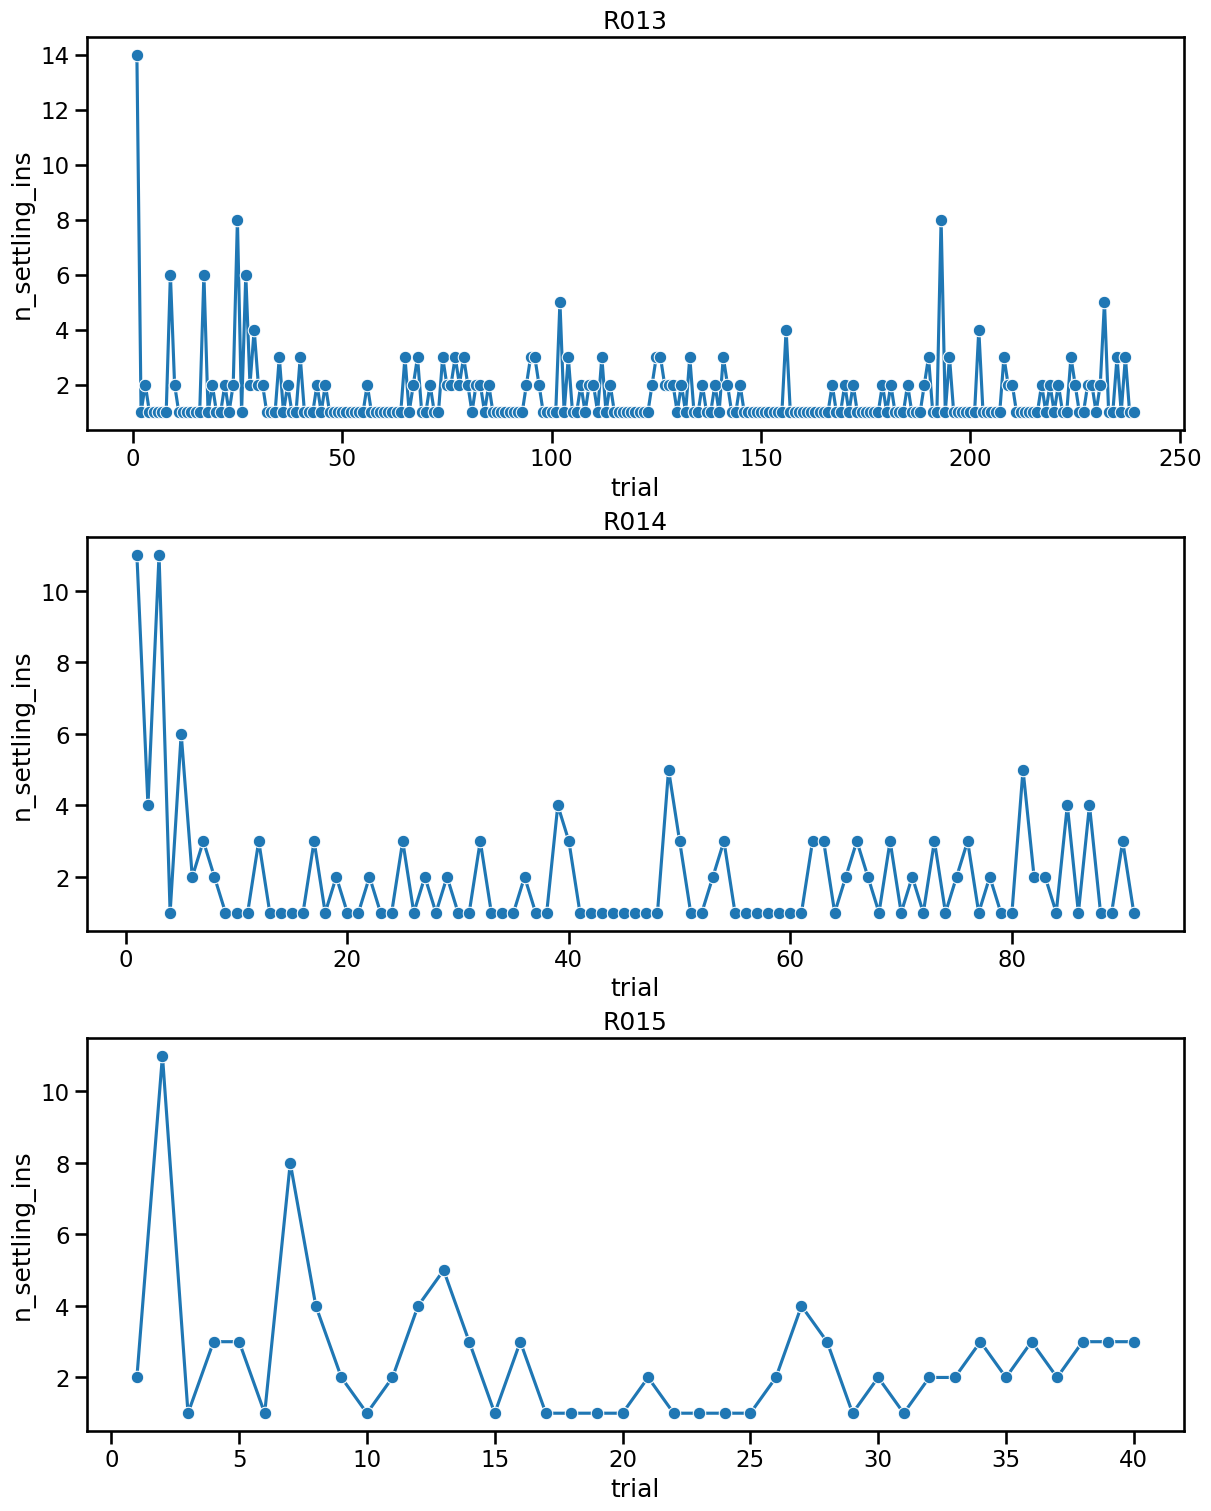

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(12, 15), constrained_layout=True)
for i, (animal_id, sub_df) in enumerate(
    trials_df.query("date == @dm").groupby("animal_id")
):
    sns.lineplot(x="trial", y="n_settling_ins", data=sub_df, ax=ax[i], marker="o")
    ax[i].title.set_text(animal_id)

In [45]:
np.sum(sub_df.n_settling_ins > 1) / len(sub_df)

0.65

In [52]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [27]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R01s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min="2023-06-27",
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

partial dj load with new date min 2023-06-27 -> 2023-07-24
Returning appended df with entries between 2023-06-27 and 2023-07-26
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/R01s_days_df.csv


False
False
False


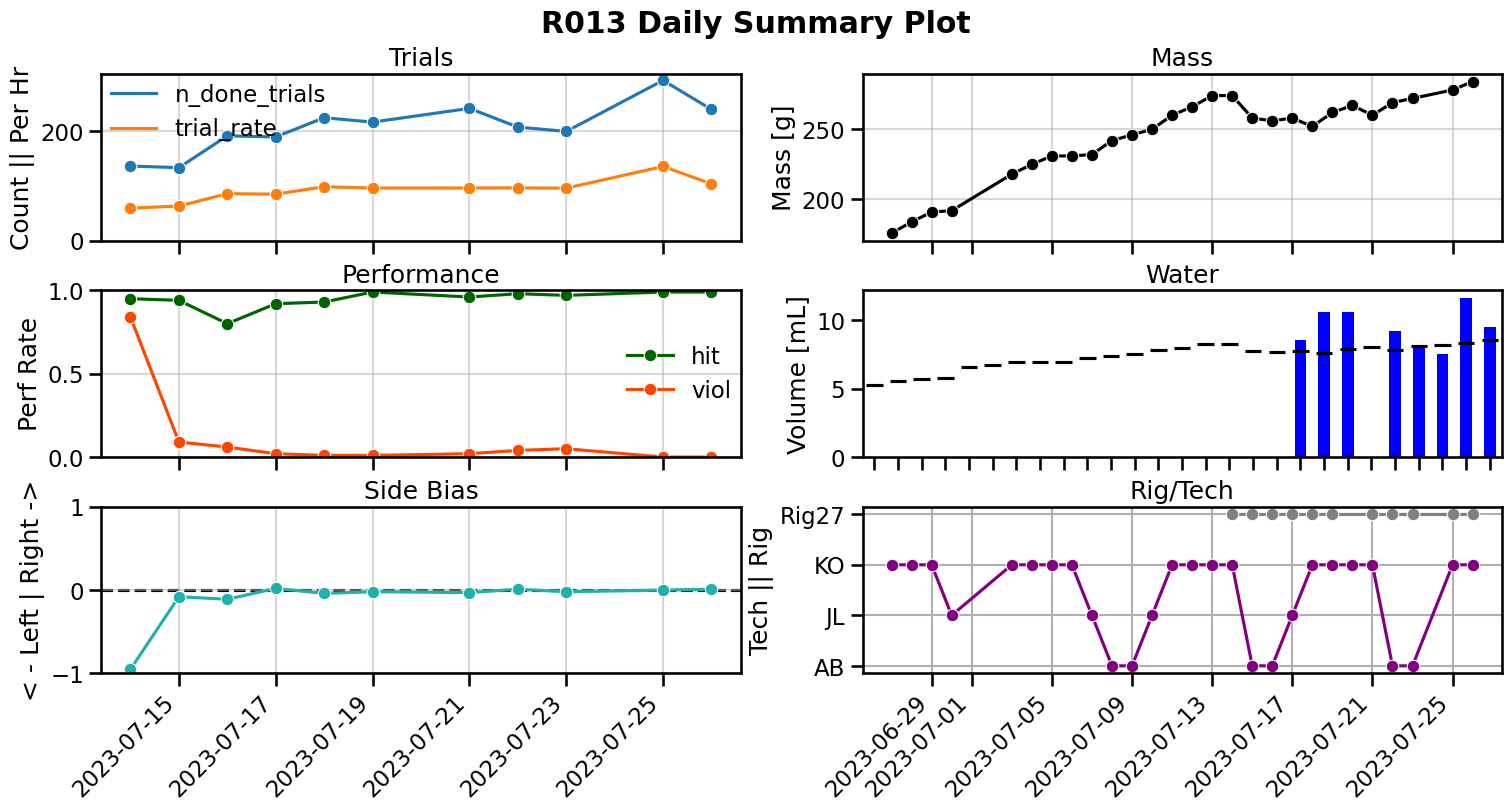

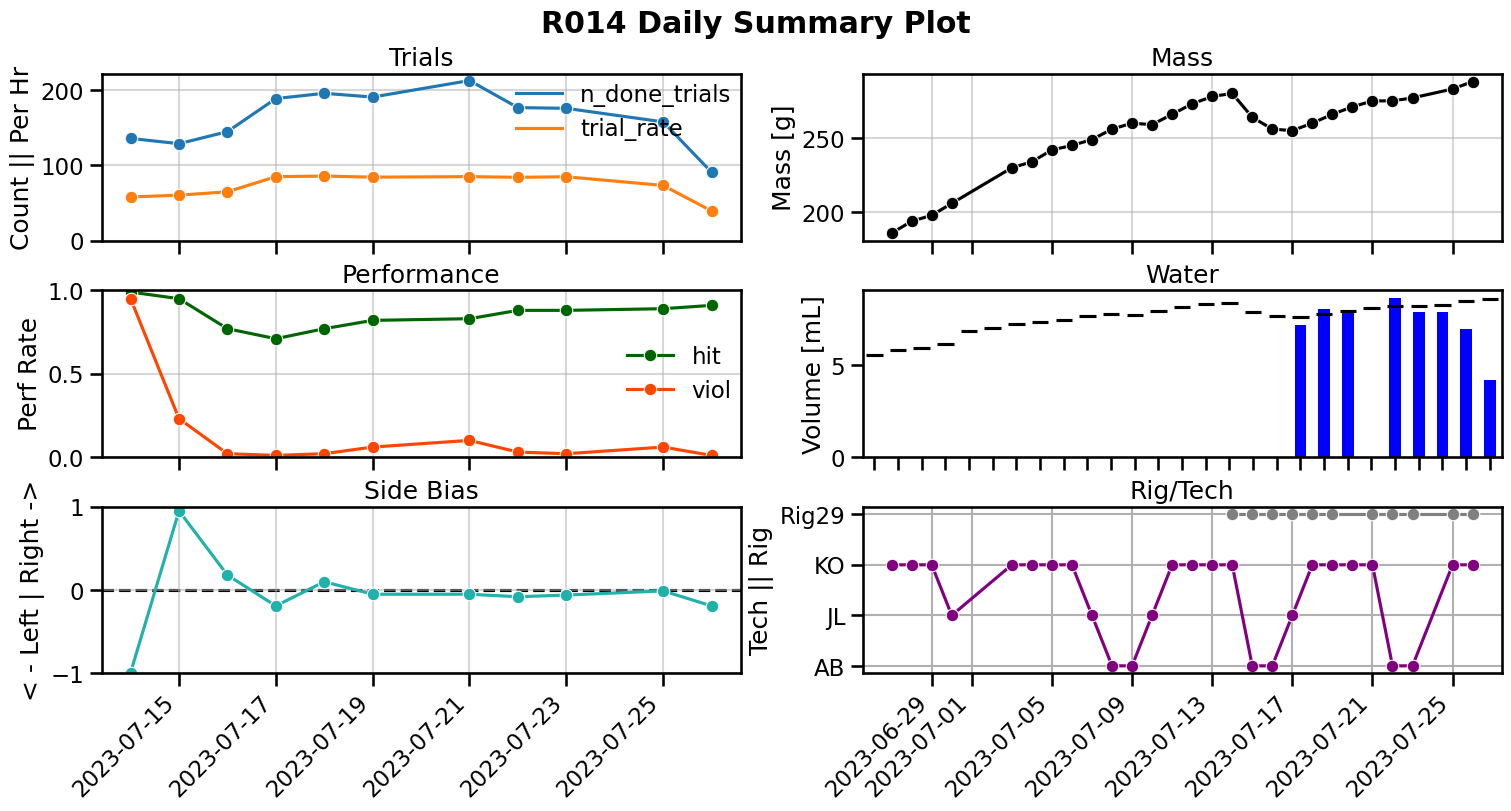

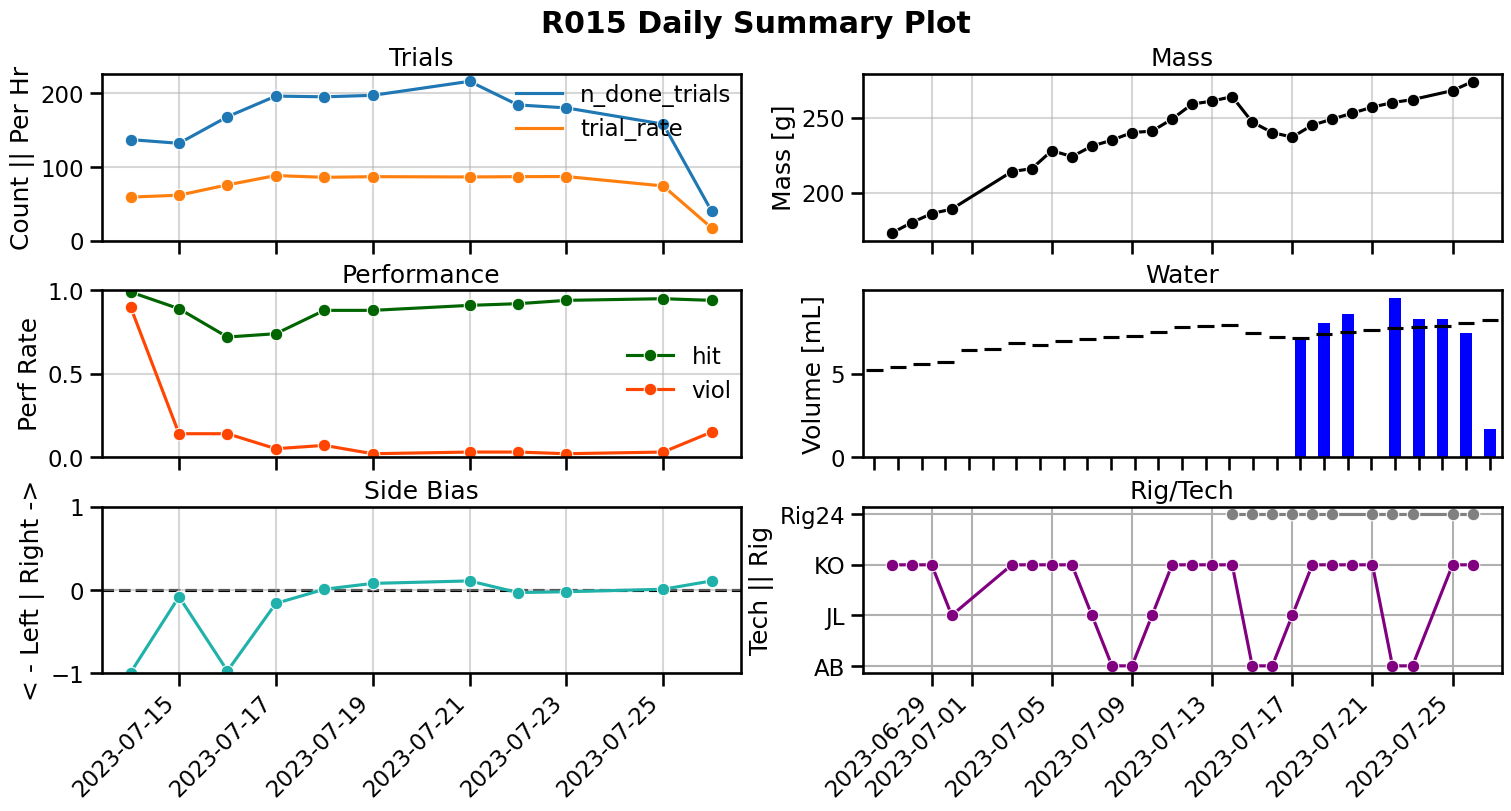

In [30]:
for animal_id, sub_df in days_df.groupby("animal_id"):
    multiplot_multi_day_summary(animal_id, sub_df)